In [3]:
import os
import pandas as pd
import numpy as np
import sys
sys.path.append("/data/home/sjwan/projects/Y-chromosome/")
from utils.software import *
from utils.build_path import *
from utils.load import *
from utils.plot_func.plot_paf import parse_fai

In [4]:
sample_list = os.listdir('/data/home/sjwan/projects/Y-chromosome/workflow.output/data/verkko1.4')
sample_list.sort()
fai_path = '/data/home/sjwan/projects/Y-chromosome/workflow.output/data/T2T_Y_subregion.fa.fai'
fai = pd.DataFrame(parse_fai(fai_path)).T
ref_name = fai.index

In [3]:
paf_path = f'/data/home/sjwan/projects/Y-chromosome/workflow.output/03.assembly.workflow/{sample_list[0]}/minimap.subregion.Ycontigs/T2T.minimap.paf'
paf = parse_paf(paf_path)

In [7]:
paf.sort_values(by=['query_name','query_start'],ascending=[True, True])

,query_name,query_length,query_start,query_end,strand,target_name,target_length,target_start,target_end,residue_matches,...,nn,tp,cm,s1,s2,de,zd,rl,cg,cs
7,haplotype1-0000011,24090590,0,836754,+,chrY,62460029,23909182,24734032,813655,...,0,P,146114,781221,235545,0.0004,1,671945,641M1D139M1I102M2I121M1I12047M2I7541M1I747M4D3...,
6,haplotype1-0000011,24090590,840699,1757866,+,chrY,62460029,24737977,25650564,890614,...,0,P,160776,859613,126136,0.0003,3,671945,373M1D2636M11I5201M8D1868M1I10817M1I893M1I536M...,
17,haplotype1-0000011,24090590,1757866,1760004,+,chrY,62460029,24035396,24037534,2138,...,0,I,0,0,0,0,NaN,671945,2138M,
4,haplotype1-0000011,24090590,1760004,3112905,-,chrY,62460029,22690527,24035396,1338593,...,0,P,240083,1324314,2218647,0.0006,3,671945,182M4D5M2D48M1I157M1I311M1I106M2I143M1D261M1I1...,
11,haplotype1-0000011,24090590,3115587,3130116,-,chrY,62460029,22675926,22690526,13314,...,0,P,600,3310,2218647,0.0816,3,671945,211M1D260M1I22M8D123M4I181M1I576M3I222M1D250M1...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,unassigned-0001964,148021,0,82105,-,chrY,62460029,44232675,44317176,80794,...,0,P,387,2659,3524,0.0159,NaN,138670,1056M2I278M2I6262M2D714M2I192M3D510M1D2027M2I2...,
168,unassigned-0001964,148021,25806,82236,-,chrY,62460029,49750018,49801604,50911,...,0,S,444,3524,NaN,0.0132,NaN,138670,2876M1I3150M2I278M2I1422M2D714M2I192M3D510M1D6...,
166,unassigned-0001964,148021,55377,148021,-,chrY,62460029,48554343,48651836,84540,...,0,P,960,6137,4467,0.0101,NaN,138670,5105M1I2419M1D232M2422D1612M2I196M1I2797M1I306...,
169,unassigned-0002208,68325,31,68294,-,chrY,62460029,40743954,40812166,67721,...,0,P,320,3278,2701,0.0074,NaN,65579,210M1I65M3I640M1I67M1I455M2I373M7I356M2I2052M7...,


In [9]:
reference_coverage = np.zeros(shape=[62460029],dtype=np.int8)


In [10]:
for idx, row in paf.iterrows():
    reference_coverage[row['target_start']:row['target_end']] = 1

In [11]:
np.sum(np.diff(reference_coverage)==-1)

82

In [26]:
from tqdm import tqdm
def find_continuous_zero_segments(arr, m):
    segments = []
    start = None

    for i in tqdm(range(len(arr))):
        if arr[i] == 0:
            if start is None:
                start = i
        else:
            if start is not None and i-start >= m:
                segments.append([start, i, i-start])
            start = None

    # Check for the last segment
    if start is not None and len(arr) - start >= m:
        segments.append([start, len(arr),len(arr) - start])

    return segments

In [30]:
gaps = find_continuous_zero_segments(reference_coverage, 5)

  0%|          | 0/62460029 [00:00<?, ?it/s]

100%|██████████| 62460029/62460029 [01:54<00:00, 543546.28it/s]


In [43]:
len(gaps)

82

In [48]:
import matplotlib.pyplot as plt

cmap = plt.get_cmap('viridis')
colors = [cmap(i / len(sample_list)+1) for i in range(len(sample_list)+1)]
for idx, sample in enumerate(sample_list):
    paf_path = f'/data/home/sjwan/projects/Y-chromosome/workflow.output/03.assembly.workflow/{sample}/minimap.subregion.Ycontigs/T2T.minimap.paf'
    paf = parse_paf(paf_path)
    reference_coverage = np.zeros(shape=[62460029],dtype=np.int8)
    for idx, row in paf.iterrows():
        reference_coverage[row['target_start']:row['target_end']] = 1
    gaps = find_continuous_zero_segments(reference_coverage, 50)
    gap_df = pd.DataFrame(gaps,columns=['start','end','length'])
    plt.hlines(np.full_like(gap_df['start'],idx), gap_df['start'],gap_df['end'],label=sample,colors=colors[idx])
# plt.legend()
    

100%|██████████| 62460029/62460029 [01:53<00:00, 548882.44it/s]


IndexError: list index out of range

In [5]:
def exist_overlap(region1, region2, gap=500):
    # 如果第一个区域在第二个区域的左边
    if region1[1] + gap < region2[0]:
        return False
    # 如果第一个区域在第二个区域的右边
    if region1[0] > region2[1] + gap:
        return False
    # 否则，存在重叠
    return True


class Region:

    def __init__(self, idx, line) -> None:
        self.idx = idx
        self.name = line["query_name"]
        self.contig = [line["query_start"], line["query_end"]]
        self.region = [line["target_start"], line["target_end"]]
        self.contig_length = line["query_length"]
        self.record = []
        self.record.append(line)
        self.regions = []

    def merge(self, line):
        if line["query_name"] != self.name:
            return False
        if exist_overlap(
            self.contig, [line["query_start"], line["query_end"]], self.contig_length * 0.1
        ) and exist_overlap(
            self.region, [line["target_start"], line["target_end"]], self.contig_length * 0.1
        ):

            self.contig[1] = max(line["query_end"], self.contig[1])
            self.region[1] = max(line["target_end"], self.region[1])
            self.contig[0] = min(line["query_start"], self.contig[0])
            self.region[0] = min(line["target_start"], self.region[0])
            self.record.append(line)
            return True
        return False
    
    def merge_region(self, other_region):
        if other_region.name != self.name:
            return False
        if exist_overlap(
            self.contig, other_region.contig, self.contig_length * 0.1
        ) or exist_overlap(
            self.region, other_region.region, self.contig_length * 0.1
        ):

            self.contig[1] = max(self.contig[1], self.contig[1])
            self.region[1] = max(self.region[1], self.region[1])
            self.contig[0] = min(self.contig[0], self.contig[0])
            self.region[0] = min(self.region[0], self.region[0])
            self.regions.append(other_region)
            return True
        return False

In [6]:
def calculate_line_coefficients(point1, point2):
    """
    计算通过两个点确定的直线方程的斜率和截距。

    参数:
    point1, point2: tuple, 形式为 (x, y)，表示两点的坐标。

    返回:
    m: float, 直线的斜率。
    b: float, 直线的截距。
    """
    x1, y1 = point1
    x2, y2 = point2
    
    # 计算斜率
    m = (y2 - y1) / (x2 - x1)
    
    # 计算截距
    b = y1 - m * x1
    
    return m, b

In [7]:
for idx, sample in enumerate(sample_list):
    paf_path = f'/data/home/sjwan/projects/Y-chromosome/workflow.output/03.assembly.workflow/{sample}/minimap.subregion.Ycontigs/T2T.minimap.paf'
    paf = parse_paf(paf_path)
    contigs_regions = []

    for idx, row in paf.sort_values(by=["query_name", "target_start"]).iterrows():
        if len(contigs_regions) == 0:
            contigs_regions.append(Region(idx, row))
            continue
        if not contigs_regions[-1].merge(row):
            contigs_regions.append(Region(idx, row))
    merge_regions = []

    for region in contigs_regions:
        m, b = calculate_line_coefficients(region.region, region.contig)
        merge_regions.append(
            [
                region.name,
                region.region[0],
                region.region[1],
                region.region[1] - region.region[0],
                region.contig[0],
                region.contig[1],
                region.contig[1] - region.contig[0],
                len(region.record),
                region.contig_length,
                b
            ]
        )

    merge_regions = pd.DataFrame(
        merge_regions,
        columns=[
            "name",
            "ref_start",
            "ref_end",
            'ref_length',
            "q_start",
            "q_end",
            'q_length',
            "merge_num",
            "contig_length",
            'intercept',
        ],
    )
    merge_regions.sort_values(by=["name"]).to_csv(
        f"/data/home/sjwan/projects/Y-chromosome/workflow.output/03.assembly.workflow/analysis/merge_{sample}.csv",
        index=None
    )

In [ ]:
merge_regions.sort_values(by=['name']).to_csv('/data/home/sjwan/projects/Y-chromosome/workflow.output/03.assembly.workflow/analysis/merge.csv')

In [63]:
sample_list[0]

'RY01_Yao_Male_CNYAM0001'

In [54]:
paf_path = f'/data/home/sjwan/projects/Y-chromosome/workflow.output/03.assembly.workflow/{sample_list[0]}/minimap.subregion.Ycontigs/T2T.minimap.paf'
paf = parse_paf(paf_path)
paf

,query_name,query_length,query_start,query_end,strand,target_name,target_length,target_start,target_end,residue_matches,...,nn,tp,cm,s1,s2,de,zd,rl,cg,cs
0,haplotype1-0000011,24090590,16503465,24090590,-,chrY,62460029,2016658,9586889,7562684,...,0,P,1356929,7528573,263652,0.0006,1,671945,1650M2I92M32D3128M14I769M2I7930M4D1926M18I544M...,
1,haplotype1-0000011,24090590,7085906,13443110,-,chrY,62460029,12514033,18857802,6341009,...,0,P,1141813,6298327,2218647,0.0003,3,671945,36M5I25M9I22M245I29M5I51M310I141M5I61M321I7M1I...,
2,haplotype1-0000011,24090590,3356299,6357044,-,chrY,62460029,19586495,22447834,2848184,...,0,P,503589,2777830,2218647,0.0004,3,671945,605M8I8103M2I79M2I14661M2I133M2D3534M1I208M1I3...,
3,haplotype1-0000011,24090590,15319904,17151287,-,chrY,62460029,9203142,10812761,1606291,...,0,P,281882,1554897,2218647,0.0017,1,671945,186M1D1605M1D5316M6I2348M3I783M32I1116M1D8178M...,
4,haplotype1-0000011,24090590,1760004,3112905,-,chrY,62460029,22690527,24035396,1338593,...,0,P,240083,1324314,2218647,0.0006,3,671945,182M4D5M2D48M1I157M1I311M1I106M2I143M1D261M1I1...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,unassigned-0001964,148021,55377,148021,-,chrY,62460029,48554343,48651836,84540,...,0,P,960,6137,4467,0.0101,NaN,138670,5105M1I2419M1D232M2422D1612M2I196M1I2797M1I306...,
167,unassigned-0001964,148021,0,82105,-,chrY,62460029,44232675,44317176,80794,...,0,P,387,2659,3524,0.0159,NaN,138670,1056M2I278M2I6262M2D714M2I192M3D510M1D2027M2I2...,
168,unassigned-0001964,148021,25806,82236,-,chrY,62460029,49750018,49801604,50911,...,0,S,444,3524,NaN,0.0132,NaN,138670,2876M1I3150M2I278M2I1422M2D714M2I192M3D510M1D6...,
169,unassigned-0002208,68325,31,68294,-,chrY,62460029,40743954,40812166,67721,...,0,P,320,3278,2701,0.0074,NaN,65579,210M1I65M3I640M1I67M1I455M2I373M7I356M2I2052M7...,


In [55]:
def calculate_slope_intercept(row):
    """
    计算给定行的斜率和截距。
    
    参数:
    row: pd.Series, 包含 [query_start, query_end, target_start, target_end] 的行。
    
    返回:
    slope: float, 直线的斜率。
    intercept: float, 直线的截距。
    """
    x1, x2 = row['query_start'], row['query_end']
    y1, y2 = row['target_start'], row['target_end']
    
    # 计算斜率
    slope = (y2 - y1) / (x2 - x1)
    
    # 计算截距
    intercept = y1 - slope * x1
    
    return pd.Series({'slope': slope, 'intercept': intercept/row['target_length']})

def calculate_cosine(row):
    x1, x2 = row['query_start'], row['query_end']
    y1, y2 = row['target_start'], row['target_end']
    
    # 向量 (x2 - x1, y2 - y1)
    vector1 = np.array([x2 - x1, y2 - y1])
    # 向量 (x4 - x3, y4 - y3)
    vector2 = np.array([y2 - y1, x2 - x1])
    
    # 计算点积
    dot_product = np.dot(vector1, vector2)
    # 计算向量的模
    norm1 = np.linalg.norm(vector1)
    norm2 = np.linalg.norm(vector2)
    
    # 计算余弦值
    cosine_value = dot_product / (norm1 * norm2)
    
    return pd.Series({'cosine': cosine_value})

def calculate_paf_kb(table):
    return table.apply(calculate_slope_intercept, axis=1)

def calculate_paf_cos(table):
    return table.apply(calculate_cosine, axis=1)

In [56]:
paf[['k','b']] = calculate_paf_kb(paf)
paf[['cos']] = calculate_paf_cos(paf)

In [57]:
paf.columns

Index(['query_name', 'query_length', 'query_start', 'query_end', 'strand',
       'target_name', 'target_length', 'target_start', 'target_end',
       'residue_matches', 'alignment_block_length', 'mapping_quality', 'NM',
       'ms', 'AS', 'nn', 'tp', 'cm', 's1', 's2', 'de', 'zd', 'rl', 'cg', 'cs',
       'k', 'b', 'cos'],
      dtype='object')

In [58]:
paf[['query_name', 'query_length', 'query_start', 'query_end', 'strand',
       'target_name', 'target_length', 'target_start', 'target_end','k', 'b','cos']]

,query_name,query_length,query_start,query_end,strand,target_name,target_length,target_start,target_end,k,b,cos
0,haplotype1-0000011,24090590,16503465,24090590,-,chrY,62460029,2016658,9586889,0.997773,-0.231349,0.999998
1,haplotype1-0000011,24090590,7085906,13443110,-,chrY,62460029,12514033,18857802,0.997887,0.087145,0.999998
2,haplotype1-0000011,24090590,3356299,6357044,-,chrY,62460029,19586495,22447834,0.953543,0.262346,0.998870
3,haplotype1-0000011,24090590,15319904,17151287,-,chrY,62460029,9203142,10812761,0.878909,-0.068230,0.991727
4,haplotype1-0000011,24090590,1760004,3112905,-,chrY,62460029,22690527,24035396,0.994063,0.335270,0.999982
...,...,...,...,...,...,...,...,...,...,...,...,...
166,unassigned-0001964,148021,55377,148021,-,chrY,62460029,48554343,48651836,1.052340,0.776434,0.998700
167,unassigned-0001964,148021,0,82105,-,chrY,62460029,44232675,44317176,1.029182,0.708176,0.999586
168,unassigned-0001964,148021,25806,82236,-,chrY,62460029,49750018,49801604,0.914159,0.796132,0.995986
169,unassigned-0002208,68325,31,68294,-,chrY,62460029,40743954,40812166,0.999253,0.652320,1.000000


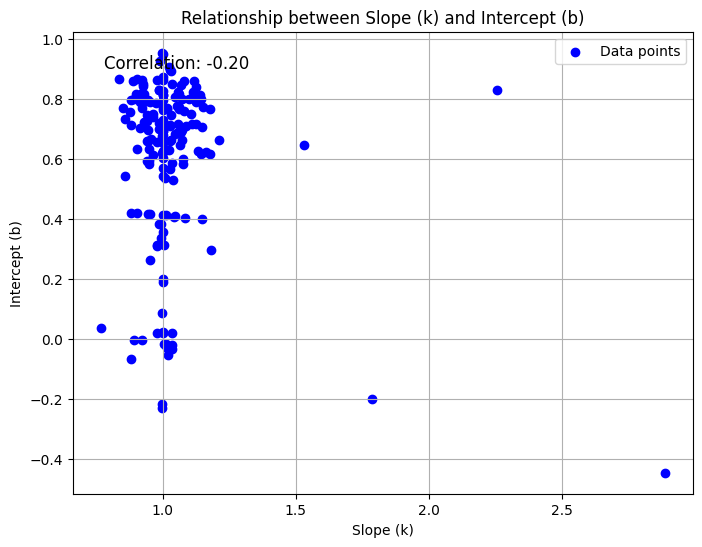

In [59]:
import matplotlib.pyplot as plt
# 计算斜率 k 和截距 b
paf[['k', 'b']] = paf.apply(calculate_slope_intercept, axis=1)

# 计算相关系数
correlation = paf[['k', 'b']].corr().iloc[0, 1]

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(paf['k'], paf['b'], color='blue', label='Data points')
plt.xlabel('Slope (k)')
plt.ylabel('Intercept (b)')
plt.title('Relationship between Slope (k) and Intercept (b)')
plt.legend()

# 在图中显示相关系数
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes,
         fontsize=12, verticalalignment='top')

plt.grid(True)
plt.show()

In [70]:
paf[paf['query_name'] == 'haplotype1-0000011']

,query_name,query_length,query_start,query_end,strand,target_name,target_length,target_start,target_end,residue_matches,...,s1,s2,de,zd,rl,cg,cs,k,b,cos
0,haplotype1-0000011,24090590,16503465,24090590,-,chrY,62460029,2016658,9586889,7562684,...,7528573,263652,0.0006,1,671945,1650M2I92M32D3128M14I769M2I7930M4D1926M18I544M...,,0.997773,-0.231349,0.999998
1,haplotype1-0000011,24090590,7085906,13443110,-,chrY,62460029,12514033,18857802,6341009,...,6298327,2218647,0.0003,3,671945,36M5I25M9I22M245I29M5I51M310I141M5I61M321I7M1I...,,0.997887,0.087145,0.999998
2,haplotype1-0000011,24090590,3356299,6357044,-,chrY,62460029,19586495,22447834,2848184,...,2777830,2218647,0.0004,3,671945,605M8I8103M2I79M2I14661M2I133M2D3534M1I208M1I3...,,0.953543,0.262346,0.998870
3,haplotype1-0000011,24090590,15319904,17151287,-,chrY,62460029,9203142,10812761,1606291,...,1554897,2218647,0.0017,1,671945,186M1D1605M1D5316M6I2348M3I783M32I1116M1D8178M...,,0.878909,-0.068230,0.991727
4,haplotype1-0000011,24090590,1760004,3112905,-,chrY,62460029,22690527,24035396,1338593,...,1324314,2218647,0.0006,3,671945,182M4D5M2D48M1I157M1I311M1I106M2I143M1D261M1I1...,,0.994063,0.335270,0.999982
5,haplotype1-0000011,24090590,13867013,15123198,-,chrY,62460029,10812948,12091637,1249119,...,1148022,2218647,0.0024,3,671945,11859M342D5133M1I1447M1D14617M1I42674M10D578M5...,,1.017915,-0.052874,0.999842
6,haplotype1-0000011,24090590,840699,1757866,+,chrY,62460029,24737977,25650564,890614,...,859613,126136,0.0003,3,671945,373M1D2636M11I5201M8D1868M1I10817M1I893M1I536M...,,0.995006,0.382668,0.999987
7,haplotype1-0000011,24090590,0,836754,+,chrY,62460029,23909182,24734032,813655,...,781221,235545,0.0004,1,671945,641M1D139M1I102M2I121M1I12047M2I7541M1I747M4D3...,,0.985774,0.382792,0.999897
8,haplotype1-0000011,24090590,6396797,7082449,-,chrY,62460029,18861259,19546750,685298,...,682151,2218647,0.0003,3,671945,17806M2I48M23I43M8I10136M29I7014M2D2561M8D42M1...,,0.999765,0.199583,1.000000
9,haplotype1-0000011,24090590,13481343,13818342,-,chrY,62460029,12160779,12471170,301603,...,235310,2218647,0.0095,3,671945,41M2I7M3D5M4D23M110D64M1I47M124D151M10D21M1D3M...,,0.921044,-0.004101,0.996627


In [95]:
def euclidean_distance(point1, point2):
    # 计算欧式距离
    # print(point1, point2)
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)


def min_euclidean_distance(cluster1, cluster2):
    # 获取两个类中最左边和最右边的点
    left1 = cluster1.loc[cluster1['query_start'].idxmin()]
    right1 = cluster1.loc[cluster1['query_end'].idxmax()]
    left2 = cluster2.loc[cluster2['query_start'].idxmin()]
    right2 = cluster2.loc[cluster2['query_end'].idxmax()]

    # 计算四个可能的欧式距离
    distances = [
        euclidean_distance([left1['query_start'], left1['target_start']], [right2['query_end'], right2['target_end']]),
        euclidean_distance([right1['query_end'], right1['target_end']], [left2['query_start'], left2['target_start']]),
    ]
    # print(distances)
    return min(distances)


def query_projection_length(cluster):
    # 计算在 query 轴上的投影长度
    left = cluster.loc[cluster['query_start'].idxmin()]
    right = cluster.loc[cluster['query_end'].idxmax()]
    q = np.abs(right['query_end'] - left['query_start'])
    t = np.abs(right['target_end'] - left['target_start'])
    g = min(q / t, t / q)
    return g * euclidean_distance([left['query_start'], left['target_start']], [right['query_end'], right['target_end']])


def cluster_paf(paf):
    # # 检查是否大多数 strand 为负
    if (paf['strand'] == '-').sum() > (paf['strand'] == '+').sum():
        # 交换 query_start 和 query_end
        paf.loc[:, ['target_start', 'target_end']] = paf.loc[:, ['target_end', 'target_start']].values

    # 初始化每一行作为一个单独的类
    clusters = [[i] for i in range(len(paf))]

    while True:
        # 按照投影长度从大到小排序
        clusters = sorted(clusters, key=lambda c: query_projection_length(paf.iloc[c]), reverse=True)

        merged = False
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster1 = paf.iloc[clusters[i]]
                cluster2 = paf.iloc[clusters[j]]
                # print(clusters[i])
                # print(clusters[j])
                min_distance = min_euclidean_distance(cluster1, cluster2)

                projection_length = query_projection_length(paf.iloc[clusters[i] + clusters[j]])
                # print(projection_length)

                if min_distance <= (projection_length / 2):
                    # 合并类
                    clusters[i].extend(clusters[j])
                    del clusters[j]
                    merged = True
                    break
            if merged:
                break
        if not merged:
            break

    return clusters


def plot_dotplot(paf, clusters, name):
    # 定义颜色
    colors = plt.get_cmap('rainbow')

    # 绘制 dotplot
    plt.figure(figsize=(10, 10))
    clusters_label = [0 for _ in range(len(clusters))]
    for cluster_index, cluster in enumerate(clusters):
        color = colors(cluster_index / len(clusters))  # Normalize color index
        for idx in cluster:
            row = paf.iloc[idx]
            # if row['strand'] == '+':
            plt.scatter(row['query_start'], row['target_start'], color=color, s=30, marker='o')
            plt.scatter(row['query_end'], row['target_end'], color=color, s=30, marker='s')
            if clusters_label[cluster_index] == 0:
                plt.plot([row['query_start'], row['query_end']],
                         [row['target_start'], row['target_end']], color=color, linestyle='--', label=cluster_index)
                clusters_label[cluster_index] = 1
            else:
                plt.plot([row['query_start'], row['query_end']],
                         [row['target_start'], row['target_end']], color=color, linestyle='--')
            # else:
            #     plt.scatter(row['query_end'], row['target_start'], color=color, s=10, marker='o')
            #     plt.scatter(row['query_start'], row['target_end'], color=color, s=10, marker='s')
            #     plt.plot([row['query_end'], row['query_start']],
            #              [row['target_start'], row['target_end']], color=color, linestyle='--')

    # 绘制垂直虚线表示序列的起始位置和终止位置
    query_length = paf[['query_start', 'query_end']].values.max()
    plt.axvline(x=0, color='green', linestyle='--', label='Sequence Start')
    plt.axvline(x=query_length, color='purple', linestyle='--', label='Sequence End')

    plt.xlabel('Query Sequence')
    plt.ylabel('Target Sequence')
    plt.title(f'Dotplot of Query vs Target {name}')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

In [96]:
for name in paf['query_name'].unique():
    if 'haplotype' in name:
        plot_dotplot(paf[paf['query_name'] == name], name)

TypeError: plot_dotplot() missing 1 required positional argument: 'name'

In [114]:
import matplotlib.cm as cm


def euclidean_distance(point1, point2):
    # 计算欧式距离
    # print(point1, point2)
    return np.sqrt((point1[0] - point2[0]) ** 2 + (point1[1] - point2[1]) ** 2)


def min_euclidean_distance(cluster1, cluster2):
    # 获取两个类中最左边和最右边的点
    left1 = cluster1.loc[cluster1['query_start'].idxmin()]
    right1 = cluster1.loc[cluster1['query_end'].idxmax()]
    left2 = cluster2.loc[cluster2['query_start'].idxmin()]
    right2 = cluster2.loc[cluster2['query_end'].idxmax()]

    # 计算四个可能的欧式距离
    distances = [
        euclidean_distance([left1['query_start'], left1['target_start']], [right2['query_end'], right2['target_end']]),
        euclidean_distance([right1['query_end'], right1['target_end']], [left2['query_start'], left2['target_start']]),
    ]
    # print(distances)
    return max(distances)


def query_projection_length(cluster):
    # 计算在 query 轴上的投影长度
    left = cluster.loc[cluster['query_start'].idxmin()]
    right = cluster.loc[cluster['query_end'].idxmax()]
    q = np.abs(right['query_end'] - left['query_start'])
    t = np.abs(right['target_end'] - left['target_start'])
    g = min(q / t, t / q) 
    # g = 1
    return g * euclidean_distance([left['query_start'], left['target_start']], [right['query_end'], right['target_end']])


def cluster_paf(paf):
    # # 检查是否大多数 strand 为负
    if (paf['strand'] == '-').sum() > (paf['strand'] == '+').sum():
        # 交换 query_start 和 query_end
        paf.loc[:, ['target_start', 'target_end']] = paf.loc[:, ['target_end', 'target_start']].values

    # 初始化每一行作为一个单独的类
    clusters = [[i] for i in range(len(paf))]

    while True:
        # 按照投影长度从大到小排序
        clusters = sorted(clusters, key=lambda c: query_projection_length(paf.iloc[c]), reverse=True)

        merged = False
        for i in range(len(clusters)):
            for j in range(i + 1, len(clusters)):
                cluster1 = paf.iloc[clusters[i]]
                cluster2 = paf.iloc[clusters[j]]
                # print(clusters[i])
                # print(clusters[j])
                min_distance = min_euclidean_distance(cluster1, cluster2)

                projection_length = query_projection_length(paf.iloc[clusters[i] + clusters[j]])
                # print(projection_length)

                if min_distance <= (projection_length):
                    # 合并类
                    clusters[i].extend(clusters[j])
                    del clusters[j]
                    merged = True
                    break
            if merged:
                break
        if not merged:
            break

    return clusters


def plot_dotplot(paf, clusters, name, out_fig):
    # 定义颜色
    colors = plt.get_cmap('rainbow')

    # 绘制 dotplot
    plt.figure(figsize=(10, 10))
    clusters_label = [0 for _ in range(len(clusters))]
    for cluster_index, cluster in enumerate(clusters):
        color = colors(cluster_index / len(clusters))  # Normalize color index
        for idx in cluster:
            row = paf.iloc[idx]
            # if row['strand'] == '+':
            plt.scatter(row['query_start'], row['target_start'], color=color, s=30, marker='o')
            plt.scatter(row['query_end'], row['target_end'], color=color, s=30, marker='s')
            if clusters_label[cluster_index] == 0:
                plt.plot([row['query_start'], row['query_end']],
                         [row['target_start'], row['target_end']], color=color, linestyle='--', label=cluster_index)
                clusters_label[cluster_index] = 1
            else:
                plt.plot([row['query_start'], row['query_end']],
                         [row['target_start'], row['target_end']], color=color, linestyle='--')
            # else:
            #     plt.scatter(row['query_end'], row['target_start'], color=color, s=10, marker='o')
            #     plt.scatter(row['query_start'], row['target_end'], color=color, s=10, marker='s')
            #     plt.plot([row['query_end'], row['query_start']],
            #              [row['target_start'], row['target_end']], color=color, linestyle='--')

    # 绘制垂直虚线表示序列的起始位置和终止位置
    query_length = paf[['query_start', 'query_end']].values.max()
    plt.axvline(x=0, color='green', linestyle='--', label='Sequence Start')
    plt.axvline(x=query_length, color='purple', linestyle='--', label='Sequence End')

    plt.xlabel('Query Sequence')
    plt.ylabel('Target Sequence')
    plt.title(f'Dotplot of Query vs Target {name}')
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.savefig(out_fig)
    plt.close()

In [115]:

for idx, sample in enumerate(sample_list):
    paf_path = f'/data/home/sjwan/projects/Y-chromosome/workflow.output/03.assembly.workflow/{sample}/minimap.subregion.Ycontigs/T2T.minimap.paf'
    paf = parse_paf(paf_path)
    out_dir = '/data/home/sjwan/projects/Y-chromosome/workflow.output/03.assembly.workflow/analysis/img'
    sample_dir = join_and_make_path(out_dir, sample)
    for name in paf['query_name'].unique():
        if 'haplotype' in name:
            temp_paf = paf[paf['query_name'] == name]
            clusters = cluster_paf(temp_paf)
            plot_dotplot(temp_paf, clusters, name, join_path(sample_dir, name+'.png'))

In [98]:
paf_path = f'/data/home/sjwan/projects/Y-chromosome/workflow.output/03.assembly.workflow/{sample_list[0]}/minimap.subregion.Ycontigs/T2T.minimap.paf'
paf = parse_paf(paf_path)